# 🧠 CELL 1 — Imports  

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from pathlib import Path
import sys


# 🧠 CELL 2 — Set project root & import preprocess function

In [45]:
import sys
from pathlib import Path

# Go 2 levels up from notebook to reach project root
PROJECT_ROOT = Path().resolve().parents[1]

print("Project Root:", PROJECT_ROOT)

# Add root and scripts folder to Python path
sys.path.append(str(PROJECT_ROOT))
sys.path.append(str(PROJECT_ROOT / "scripts"))


Project Root: C:\College-Work\Projects\AEGIS-XAI-NIDS


In [46]:
from aegis.data.preprocess.preprocess import preprocess_dataframe
from scripts.run_preprocess import load_dataset


# 🧠 CELL 3 — Choose Dataset

In [47]:
DATASET = "unsw"   # "cicids" or "unsw" or "botiot"
print(f"Dataset selected: {DATASET}")


Dataset selected: unsw


# 🧠 CELL 4 — Load the dataset

In [48]:
df = load_dataset(DATASET)
print("Loaded shape:", df.shape)
df.head()


[+] Loading UNSW CSV: C:\College-Work\Projects\AEGIS-XAI-NIDS\aegis\data\raw\UNSW-NB15\UNSW_NB15_training.csv
Loaded shape: (82332, 41)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,1,3,0,0,0,2,3,0,Normal,0


# 🧠 CELL 5 — Preprocess

In [49]:
X_train, X_test, y_train, y_test = preprocess_dataframe(df)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


[+] Using label column: label

[DEBUG] Numeric columns detected: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
[DEBUG] Number of numeric cols: 40
X_train: (65865, 40)
X_test: (16467, 40)
y_train: (65865,)
y_test: (16467,)


# 🧠 CELL 6 — Train Logistic Regression

In [50]:
lr = LogisticRegression(max_iter=500, n_jobs=-1)
lr.fit(X_train, y_train)

print("Logistic Regression Training Done.")


Logistic Regression Training Done.


# 🧠 CELL 7 — LR Metrics

In [51]:
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.883888990101415
Precision: 0.8841136793325248
Recall: 0.883888990101415
F1 Score: 0.8835717182043559


# 🧠 CELL 8 — Confusion Matrix Heatmap (Visual)

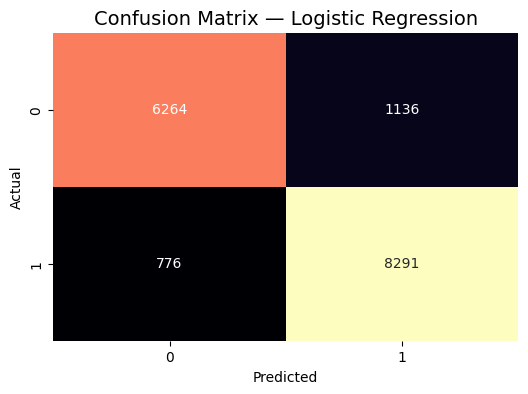

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False)
plt.title("Confusion Matrix — Logistic Regression", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🧠 CELL 9 — Train Random Forest

In [53]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("Random Forest Training Done.")


Random Forest Training Done.


# 🧠 CELL 10 — RF Metrics

In [54]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.9763162689014392
Precision: 0.9763879893527109
Recall: 0.9763162689014392
F1 Score: 0.9763277268433307


# 🧠 CELL 11 — RF Confusion Matrix Heatmap

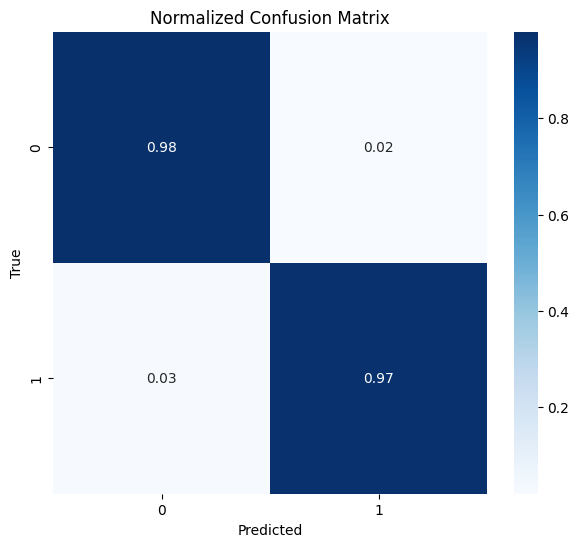

In [55]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# SVM MODEL

In [56]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

print("SVM (LinearSVC) Training Done.")


SVM (LinearSVC) Training Done.


In [57]:
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.8779376935689561
Precision: 0.8782607697087265
Recall: 0.8779376935689561
F1 Score: 0.877550451877016


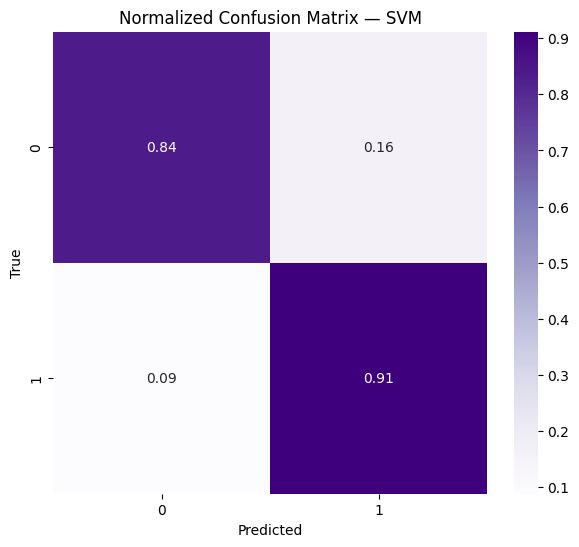

In [58]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt=".2f")
plt.title("Normalized Confusion Matrix — SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Gradient Boosting Classifier Model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("Gradient Boosting Training Done.")


Gradient Boosting Training Done.


In [60]:
y_pred = gb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.9554867310378332
Precision: 0.9555103790086172
Recall: 0.9554867310378332
F1 Score: 0.9554951394403977


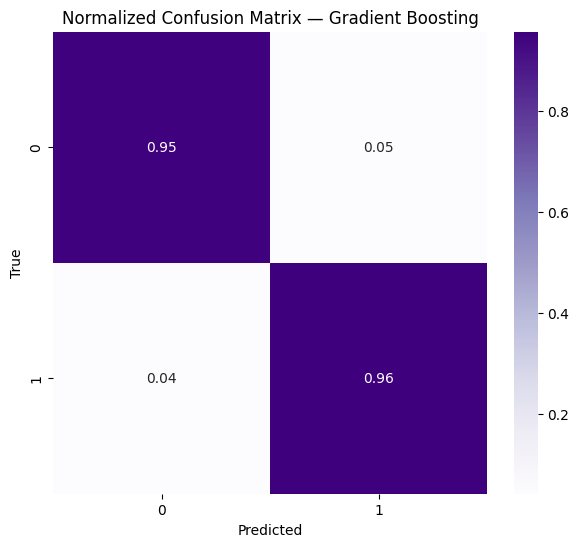

In [61]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt=".2f")
plt.title("Normalized Confusion Matrix — Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 🧠 CELL 12 — Save Models

In [62]:
import joblib

joblib.dump(lr, f"{DATASET}_logistic_model.joblib")
joblib.dump(rf, f"{DATASET}_rf_model.joblib")
joblib.dump(svm, f"{DATASET}_svm_model.joblib")
joblib.dump(gb, f"{DATASET}_gb_model.joblib")

print("Models saved successfully.")


Models saved successfully.
